# How to handle categorical missing values using various techniques

## 1) Frequent Category Imputations

In [36]:
import pandas as pd
df=pd.read_csv('loan.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [37]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [39]:
df.shape

(1460, 4)

In [40]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [41]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [42]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [43]:
#Finding percentage of missing values

In [44]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [45]:
##fireplcaeQu has highest percentage NaN values of 47%

In [46]:
#here we can see out of 1406 records based on line 17. BsmtQual,GarageType has les no. of missing values which can be re[laced using the most frequent value in those fields  

### Compute frequency for every feature

In [47]:
#here we are using the groupby function on ['BsmtQual'] to check the count of all the categories of data present in ['BsmtQual']

In [48]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [49]:
#plotting the count of categories

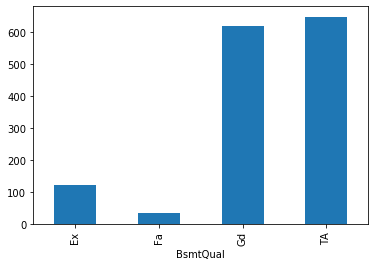

In [50]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [51]:
#from the above study we can see that "TA" is the most frequently occuring category for BsmtQual.
##And we plan to replace the missing values with 'TA'

In [52]:
#sorting the bar graph

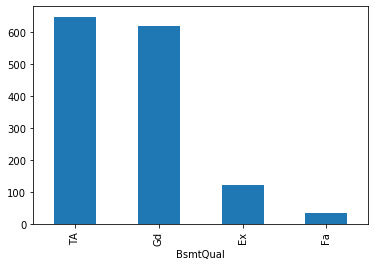

In [53]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [54]:
#checking for garange type feature

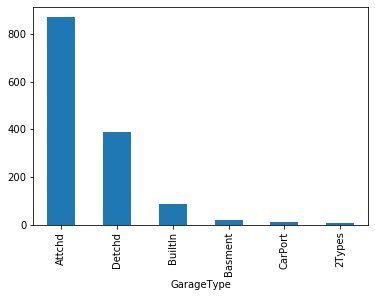

In [55]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [56]:
#here we see in "GarageType". Attached is the most frequent category

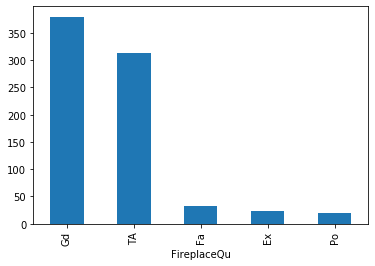

In [57]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [58]:
#in FireplaceQu 'gd' is top occuring category

##### replacing the missing values using a replcing function

In [59]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [60]:
##what if category names as list
df['GarageType'].value_counts().index

#here df['GarageType'].value_counts() will give the most frequent value in category and display in descending order
#here df['GarageType'].value_counts().index will give the values name which is present in category

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [61]:
df['GarageType'].value_counts().index[0]

#here df['GarageType'].value_counts().index(0) will give the category name which is most occuring . i.e first index

'Attchd'

In [62]:
df['GarageType'].mode()[0]
#we can also use mode for the same purpose

'Attchd'

#### creating a function that will impute the missing values in any category with most frequent values in that category

In [63]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    
#here variable is basically cattegories/features [''BsmtQual','FireplaceQu','GarageType']
#here in line 2 i.e most_frequent_category we are finding values in categories which are most frequently occuring
##here df['GarageType'].value_counts().index(0) will give the values name which is most occuring. i.e first index
#here line 3 will fill the missing values i.e fillna() with the values found in most frequent category

In [64]:
##Now replacing all the 3 categories together ['BsmtQual','FireplaceQu','GarageType']

In [65]:
#here we arestoring and iterating through list of fetaures(categories)
#calling the function and replacing all the missing values in all the 3 categories
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [66]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [67]:
#as we see above all missing values are replaced with most frequent values of each categories that we plotted the graph for

### Advantages

1) Easy To implement

2) Fater way to implement

 ### Disadvantages


3) Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

4) It distorts the relation of the most frequent label

## 2) Adding variable to capture NaN

In [68]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [69]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
import numpy as np

In [72]:
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [74]:
#finding most frequent value

frequent = df['BsmtQual'].mode()[0]

In [75]:
df['BsmtQual'].fillna(frequent)

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [76]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [77]:
df['FireplaceQu_Var']= np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [78]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Suppose if you have more frequent categories, we just replace NAN with a new category

In [79]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [80]:

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [81]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])
    
    #wherever value is null we are going to to create new value in nan field called missing, 

In [82]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [84]:
#then we will drop the feature and we will be using the newly cretaed feature as original feature null values is reperesented as missing and all other non null values are captured as it is.
#hence we can drop old feature

In [85]:

df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [86]:

df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


#### Handle Categorical Features

##### One Hot Encoding

In [87]:
df =pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df =pd.read_csv('titanic_train.csv', usecols = ['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [89]:
#using one hot encoding using get_dummies

pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [90]:
df =pd.read_csv('titanic_train.csv', usecols = ['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [91]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [92]:
df.dropna(inplace=True)

In [93]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [94]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [95]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [96]:
#dropping first feature as it can be represented by other two feature
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [120]:
### Perform one hot encoding with many categories in feature

In [121]:
df = pd.read_csv('mercedezbenz.csv')

In [122]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df = pd.read_csv('mercedezbenz.csv', usecols= ["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [124]:
df["X0"].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [125]:
df["X0"].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [126]:
len(df["X0"].unique())

47

In [127]:
for i in df.columns:
    print(i , len(df[i].unique()))

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12


### Using KDD Cup Orange Competition technique

#### Taking top 10 most frequent values in each categories and doing one hot enconding on this

In [128]:
df["X0"].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [129]:
df["X0"].value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [130]:
df["X0"].value_counts().sort_values(ascending=False).head(10).index

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [131]:
lst_10 = df["X0"].value_counts().sort_values(ascending=False).head(10).index
lst_10 = list(lst_10)

In [132]:
lst_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [133]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df["X0"]==categories,1,0)
    
#here we are using numpy to encode the top 10 categories in "X0" as 1. 
#we indentified the top_10 categories of "X0" in lst_10
#the remaining categories we can just label as 0 

In [134]:
df[lst_10]

,z,ak,y,ay,t,x,o,f,n,w
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0
4206,0,1,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0


In [135]:
lst_10.append('X0')

In [136]:
df[lst_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al
